<a href="https://colab.research.google.com/github/Nidhi-S-Vas/Assignment-case_studies/blob/main/Assessment_1_Supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the training dataset

In [1]:
import pandas as pd
Traindata=pd.read_csv("/content/train_LZdllcl.csv")
Traindata.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Basic info checking

In [2]:
# Check shape, column types
print(Traindata.shape)
print(Traindata.info())


(54808, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB
N

In [3]:
Traindata.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [4]:
#checking duplicates
Traindata.duplicated().sum()

np.int64(0)

No duplicates

In [5]:
#checking the missing values in the data

(round(Traindata.isnull().mean()*100,3))

,0
employee_id,0.000
department,0.000
region,0.000
education,4.395
gender,0.000
recruitment_channel,0.000
no_of_trainings,0.000
age,0.000
previous_year_rating,7.524
length_of_service,0.000


There is missing value in previous_year_rating,education
so replace them using simple imputer median for numerical data and mode for catagorical data

In [6]:
#removing the missing value

from sklearn.impute import SimpleImputer

imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

Traindata['previous_year_rating'] = imputer_num.fit_transform(Traindata[['previous_year_rating']])
Traindata[['education']] = imputer_cat.fit_transform(Traindata[['education']])

In [7]:
#checking the missing values in the data after applying simple imputer

(round(Traindata.isnull().mean()*100,3))

,0
employee_id,0.0
department,0.0
region,0.0
education,0.0
gender,0.0
recruitment_channel,0.0
no_of_trainings,0.0
age,0.0
previous_year_rating,0.0
length_of_service,0.0


Missing values are handled and no missing value now

checking the skewness

In [8]:
#checking the skewness ofthe data
Traindata.select_dtypes(include="number").skew()

,0
employee_id,-0.003128
no_of_trainings,3.445434
age,1.007432
previous_year_rating,-0.260858
length_of_service,1.738061
KPIs_met >80%,0.619909
awards_won?,6.338914
avg_training_score,0.451908
is_promoted,2.972339


<Axes: >

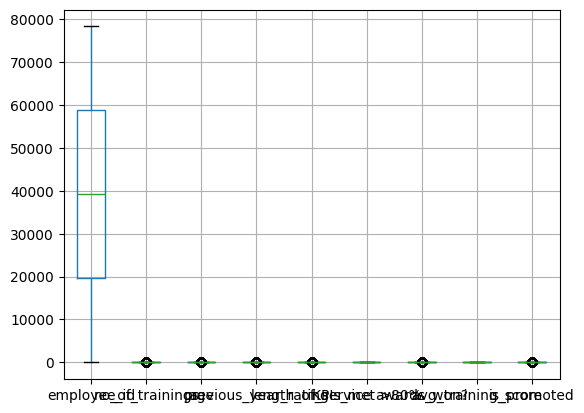

In [9]:
Traindata.boxplot()

In [10]:
import numpy as np

# Right-skewed columns
Traindata['no_of_trainings'] = np.log1p(Traindata['no_of_trainings'])
Traindata['length_of_service'] = np.log1p(Traindata['length_of_service'])


# Moderate right-skew
Traindata['age'] = np.sqrt(Traindata['age'])
Traindata['KPIs_met >80%'] = np.sqrt(Traindata['KPIs_met >80%'])

# Slight skew
Traindata['avg_training_score'] = np.cbrt(Traindata['avg_training_score'])

In [11]:
#checking the skewness ofthe data
Traindata.select_dtypes(include="number").skew()

,0
employee_id,-0.003128
no_of_trainings,2.292700
age,0.743485
previous_year_rating,-0.260858
length_of_service,0.055984
KPIs_met >80%,0.619909
awards_won?,6.338914
avg_training_score,0.299159
is_promoted,2.972339


Applied log, square root, and cube root transformations to reduce skewness in numerical features. The binary feature awards_won? was left as 0/1; although highly skewed due to mostly zeros, no transformation is needed.

<Axes: >

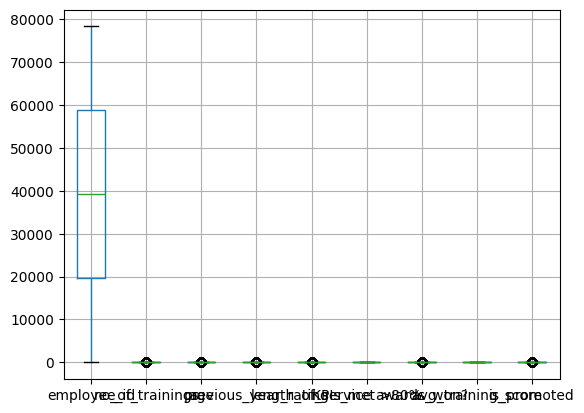

In [12]:
Traindata.boxplot()

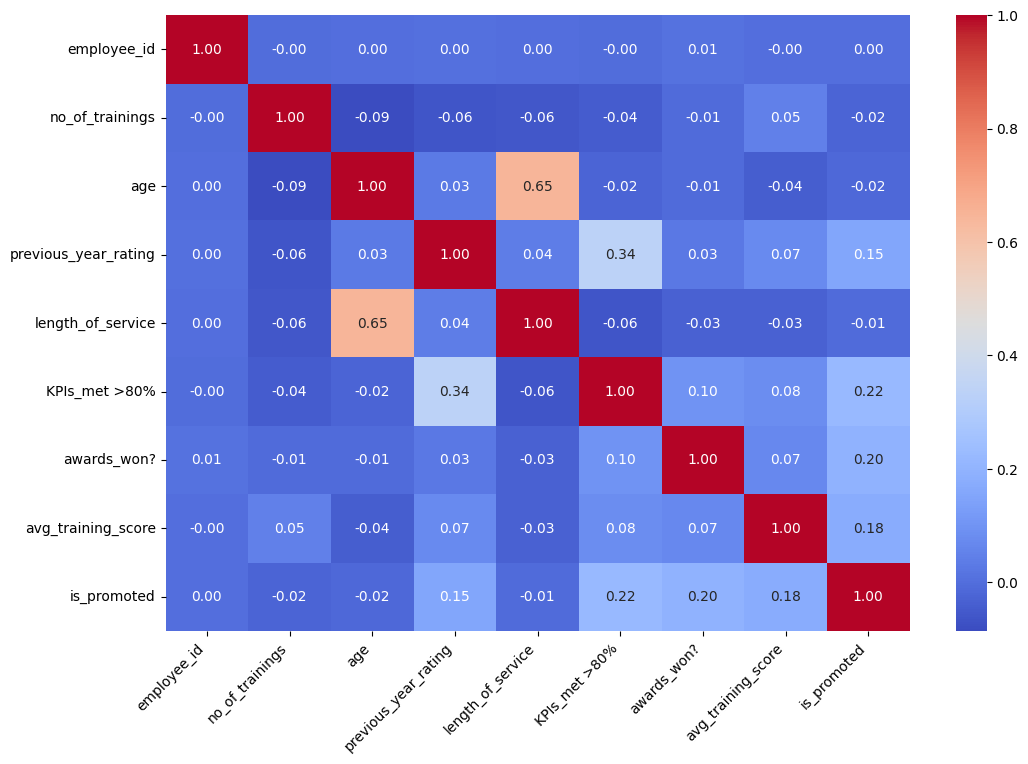

In [13]:
#to understand the correlation drawing heat map
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(Traindata.select_dtypes("number").corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

##Encoding and Scaling

In [14]:
#storing the catagoriacl column name

cat_col=Traindata.select_dtypes(include="object").columns
cat_col

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [15]:

for col in cat_col:
    print(f"{col}: {Traindata[col].nunique()} unique values")


department: 9 unique values
region: 34 unique values
education: 3 unique values
gender: 2 unique values
recruitment_channel: 3 unique values


In [16]:
for col in cat_col:
    print(f"\nValue counts for {col}:")
    print(Traindata[col].value_counts())



Value counts for department:
department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

Value counts for region:
region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count

In [17]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#  Label Encoding (binary / small category columns)
le = LabelEncoder()

# Only gender is  binary → label encode
Traindata['gender'] = le.fit_transform(Traindata['gender'])

#  One-Hot Encoding (multi-category columns)
Traindata = pd.get_dummies(Traindata,
                           columns=['department', 'education', 'recruitment_channel'],
                           drop_first=True)

#  Label Encoding for high-cardinality column
Traindata['region'] = le.fit_transform(Traindata['region'])


Traindata.head()


,employee_id,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,31,0,0.693147,5.916080,5.0,2.197225,1.0,0,3.659306,...,False,False,False,False,True,False,False,True,False,True
1,65141,14,1,0.693147,5.477226,5.0,1.609438,0.0,0,3.914868,...,False,True,False,False,False,False,False,False,False,False
2,7513,10,1,0.693147,5.830952,3.0,2.079442,0.0,0,3.684031,...,False,False,False,False,True,False,False,False,False,True
3,2542,15,1,1.098612,6.244998,1.0,2.397895,0.0,0,3.684031,...,False,False,False,False,True,False,False,False,False,False
4,48945,18,1,0.693147,6.708204,3.0,1.098612,0.0,0,4.179339,...,False,False,False,False,False,True,False,False,False,False


In [18]:
#scaling

# feature engineering selecting the features and the target
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = Traindata.drop("is_promoted", axis=1) #feature selection
y = Traindata["is_promoted"]  # target selection


print(X.shape)
print(y.shape)

(54808, 22)
(54808,)


In [19]:
#Scaling the features ,target are not scaled
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
X

array([[ 1.16185837,  1.77652645, -1.53622276, ...,  1.63469502,
        -0.14587586,  1.16635286],
       [ 1.14870885, -0.16303375,  0.65094726, ..., -0.6117349 ,
        -0.14587586, -0.85737347],
       [-1.40274081, -0.61940086,  0.65094726, ..., -0.6117349 ,
        -0.14587586,  1.16635286],
       ...,
       [-1.11916278, -1.76031862,  0.65094726, ..., -0.6117349 ,
        -0.14587586, -0.85737347],
       [-1.13262222,  2.00471   ,  0.65094726, ..., -0.6117349 ,
        -0.14587586,  1.16635286],
       [ 0.54591182, -0.16303375,  0.65094726, ..., -0.6117349 ,
        -0.14587586, -0.85737347]])

In [21]:
# splitting the data to test and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43846, 22)
(10962, 22)
(43846,)
(10962,)


In [22]:
 #Check how many are promoted vs not promoted
print(Traindata['is_promoted'].value_counts())
Traindata['is_promoted'].value_counts(normalize=True)

is_promoted
0    50140
1     4668
Name: count, dtype: int64


,proportion
is_promoted,
0,0.91483
1,0.08517


In [23]:
# Calculate Class Imbalance Ratio
max_cls = Traindata['is_promoted'].value_counts().max()
min_cls = Traindata['is_promoted'].value_counts().min()
ratio = max_cls / min_cls

print(f"Class Imbalance Ratio: {ratio:.2f}")

Class Imbalance Ratio: 10.74


The data is highly imbalanced so applying smote

In [24]:
from imblearn.over_sampling import SMOTE

#  Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: is_promoted
0    40086
1     3760
Name: count, dtype: int64
After SMOTE: is_promoted
0    40086
1    40086
Name: count, dtype: int64


In [25]:
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# --- Function to evaluate all models based on F1-score ---
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # --- Compute metrics ---
        f1_train = f1_score(y_train, y_train_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        precision = precision_score(y_test, y_test_pred, average='weighted')
        recall = recall_score(y_test, y_test_pred, average='weighted')

        results.append({
            "Model": name,
            "Train F1 Score": round(f1_train, 4),
            "Test F1 Score": round(f1_test, 4),
            "Precision (weighted)": round(precision, 4),
            "Recall (weighted)": round(recall, 4)
        })

    return pd.DataFrame(results)

# --- All models in one dictionary ---
all_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}

# --- Run Evaluation ---
results_df = evaluate_models(all_models, X_train, y_train, X_test, y_test)

# --- Display results sorted by Test F1-score ---
print("Base Model Performance Comparison (based on F1 Score):\n")
print(results_df.sort_values(by="Test F1 Score", ascending=False))


Base Model Performance Comparison (based on F1 Score):

                 Model  Train F1 Score  Test F1 Score  Precision (weighted)  \
7              XGBoost          0.9454         0.9301                0.9372   
6    Gradient Boosting          0.9258         0.9268                0.9415   
4        Random Forest          1.0000         0.9239                0.9359   
0  Logistic Regression          0.9162         0.9158                0.9269   
1                  SVC          0.9154         0.9125                0.9360   
5             AdaBoost          0.8961         0.9027                0.9223   
3        Decision Tree          1.0000         0.8999                0.9027   
2  K-Nearest Neighbors          0.9128         0.8952                0.8928   

   Recall (weighted)  
7             0.9415  
6             0.9411  
4             0.9385  
0             0.9331  
1             0.9333  
5             0.9272  
3             0.8974  
2             0.9179  


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define F1 scorer (weighted)
f1_scorer = make_scorer(f1_score, average='weighted')

# Models and hyperparameter grids
models_params = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 5, 10, 15],
            "min_samples_split": [2, 5, 10],
            "criterion": ["gini", "entropy"]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
        "params": {
            "n_estimators": [50, 100, 150],
            "max_depth": [3, 4, 5],
            "learning_rate": [0.01, 0.1, 0.2],
            "subsample": [0.7, 0.8, 1.0],
            "colsample_bytree": [0.7, 0.8, 1.0]
        }
    }
}

# Store results
results = []

# Loop through models
for name, mp in models_params.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring=f1_scorer, n_jobs=-1)
    grid.fit(X_train, y_train)  # use your scaled X_train

    # Predict on validation set
    y_val_pred = grid.best_estimator_.predict(X_test)  # or x_val_scaled if you have a separate validation
    val_f1 = f1_score(y_test, y_val_pred, average='weighted')

    # Store results
    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Validation F1 Score": val_f1
    })

# Convert to DataFrame and sort
results_df = pd.DataFrame(results).sort_values(by='Validation F1 Score', ascending=False).reset_index(drop=True)
print("\n--- Hyperparameter Tuning Results ---")
print(results_df)


Tuning Random Forest...
Tuning XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:38:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Hyperparameter Tuning Results ---
           Model                                        Best Params  \
0        XGBoost  {'colsample_bytree': 0.7, 'learning_rate': 0.2...   
1  Random Forest  {'criterion': 'entropy', 'max_depth': None, 'm...   

   Validation F1 Score  
0             0.931458  
1             0.926587  


In [32]:
from sklearn.ensemble import RandomForestClassifier

# Extract best params from hyperparameter tuning results
best_params_rf = results_df.loc[results_df['Model']=='Random Forest', 'Best Params'].values[0]

# Initialize Random Forest with best hyperparameters
best_rf = RandomForestClassifier(**best_params_rf, random_state=42)

# Combine train and validation sets if you have validation
X_full = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_val)]) if 'X_val' in globals() else X_train
y_full = pd.concat([y_train, y_val]) if 'y_val' in globals() else y_train

# Train on full data
best_rf.fit(X_full, y_full)

print("Random Forest trained on full data!")


Random Forest trained on full data!


In [33]:
from xgboost import XGBClassifier

# Extract best params from hyperparameter tuning results
best_params_xgb = results_df.loc[results_df['Model']=='XGBoost', 'Best Params'].values[0]

# Initialize XGBoost with best hyperparameters
best_xgb = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train on full data
best_xgb.fit(X_full, y_full)

print("XGBoost trained on full data!")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:56:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost trained on full data!


Loading the test data

In [27]:
Testdata=pd.read_csv("/content/test_2umaH9m.csv")
Testdata.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


Preprocessing

In [28]:
# Check shape, column types
print(Testdata.shape)
print(Testdata.info())

(23490, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB
None


In [29]:
Testdata.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [34]:
#checking duplicates
Testdata.duplicated().sum()

np.int64(0)

In [35]:
#checking missing values
Testdata.isnull().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [38]:
#removing the missing value

from sklearn.impute import SimpleImputer

imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

Testdata['previous_year_rating'] = imputer_num.fit_transform(Testdata[['previous_year_rating']])
Testdata[['education']] = imputer_cat.fit_transform(Testdata[['education']])

In [39]:
#checking missing values
Testdata.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [40]:
#ENcoding and Scaling
#check skewness
Testdata.select_dtypes(include='number').skew()

,0
employee_id,0.007315
no_of_trainings,3.299829
age,1.011777
previous_year_rating,-0.272367
length_of_service,1.703001
KPIs_met >80%,0.588650
awards_won?,6.398053
avg_training_score,0.458113


In [41]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#  Label Encoding (binary / small category columns)
le = LabelEncoder()

# Only gender is  binary → label encode
Testdata['gender'] = le.fit_transform(Testdata['gender'])

#  One-Hot Encoding (multi-category columns)
Testdata = pd.get_dummies(Testdata,
                           columns=['department', 'education', 'recruitment_channel'],
                           drop_first=True)

#  Label Encoding for high-cardinality column
Testdata['region'] = le.fit_transform(Testdata['region'])


Testdata.head()


,employee_id,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,recruitment_channel_referred,recruitment_channel_sourcing
0,8724,18,1,1,24,3.0,1,1,0,77,...,False,False,False,False,False,True,False,False,False,True
1,74430,28,0,1,31,3.0,5,0,0,51,...,False,False,False,False,False,False,False,False,False,False
2,72255,4,1,1,31,1.0,4,0,0,47,...,False,False,False,False,True,False,False,False,False,False
3,38562,11,0,3,31,2.0,9,0,0,65,...,False,False,True,False,False,False,False,False,False,False
4,64486,21,1,1,30,4.0,7,0,0,61,...,False,False,False,False,False,False,False,False,False,True


In [42]:
#scaling

# feature engineering selecting the features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_test_scaled = scaler.transform(Testdata)




In [44]:
# Random Forest Prediction
rf_predictions = best_rf.predict(X_test_scaled)

print("Random Forest Predictions:")
print(rf_predictions)

Random Forest Predictions:
[1 1 1 ... 1 1 1]


In [45]:

# XGBoost Prediction
xgb_predictions = best_xgb.predict(X_test_scaled)

print("XGBoost Predictions:")
print(xgb_predictions)

XGBoost Predictions:
[1 1 1 ... 1 1 1]


In [46]:
Submission=pd.read_csv("/content/sample_submission_M0L0uXE.csv")
Submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [48]:
 #Replace target column with predictions
Submission['is_promoted'] = xgb_predictions


In [50]:
# Save CSV
Submission.to_csv("xgb_submission.csv", index=False)

In [51]:
# Replace target column with predictions
Submission['is_promoted'] = rf_predictions

In [52]:
 #Save CSV
Submission.to_csv("rf_submission.csv", index=False)

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Define weighted F1 scorer
f1_scorer = make_scorer(f1_score, average='weighted')

# Decision Tree hyperparameter grid
dt_params = {
    "max_depth": [None, 3, 5, 7, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

# Initialize Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# GridSearchCV
grid_dt = GridSearchCV(dt_model, dt_params, cv=5, scoring=f1_scorer, n_jobs=-1)
grid_dt.fit(X_train, y_train)  # your scaled training data

# Validation predictions
y_val_pred = grid_dt.best_estimator_.predict(X_test)  # or your validation set
val_f1 = f1_score(y_test, y_val_pred, average='weighted')

# Store results in a DataFrame for consistency
results_dt = pd.DataFrame([{
    "Model": "Decision Tree",
    "Best Params": grid_dt.best_params_,
    "Validation F1 Score": val_f1
}])

print("\n--- Decision Tree Hyperparameter Tuning Results ---")
print(results_dt)



--- Decision Tree Hyperparameter Tuning Results ---
           Model                                        Best Params  \
0  Decision Tree  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

   Validation F1 Score  
0             0.923629  


In [55]:
from sklearn.tree import DecisionTreeClassifier

# Extract best params from hyperparameter tuning results
best_params_dt = results_dt.loc[results_dt['Model']=='Decision Tree', 'Best Params'].values[0]

# Initialize Decision Tree with best hyperparameters
best_dt = DecisionTreeClassifier(**best_params_dt, random_state=42)

# Train on full data (train + validation combined)
best_dt.fit(X_full, y_full)

print("Decision Tree trained on full data!")

Decision Tree trained on full data!


In [56]:
# Random Forest Prediction
dt_predictions = best_dt.predict(X_test_scaled)

print("Random Forest Predictions:")
print(dt_predictions)

Random Forest Predictions:
[1 1 1 ... 1 1 1]


In [57]:
# Replace target column with predictions
Submission['is_promoted'] = dt_predictions

In [58]:
# Save CSV
Submission.to_csv("dt_submission.csv", index=False)